In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#OLD METHOD
"""
#First Distribution
dim1 = np.random.normal(0, 1, size=500*0.2)
dim2 = np.random.normal(0, 1, size=500*0.2)

#Second Distribution
dim3 = np.random.normal(3, 1, size=500*0.5)
dim4 = np.random.normal(0, 1, size=500*0.5)

#Third Distribution
dim5 = np.random.normal(0, 1, size=500*0.3)
dim6 = np.random.normal(3, 1, size=500*0.3)
"""

/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Zac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the fu

In [14]:
"""
x = np.append(dim1, np.append(dim3, dim5))
y = np.append(dim2, np.append(dim4, dim6))
"""

In [12]:
distrib = np.random.choice([0,1,2], size=500, p=[0.2, 0.5, 0.3])

In [13]:
x = []
y = []

for i in range(len(distrib)):
    if distrib[i]==0:
        x.append(np.random.normal(0, 1))
        y.append(np.random.normal(0, 1))
    elif distrib[i]==1:
        x.append(np.random.normal(3, 1))
        y.append(np.random.normal(0, 1))
    elif distrib[i]==2:
        x.append(np.random.normal(0, 1))
        y.append(np.random.normal(3, 1))

In [14]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y

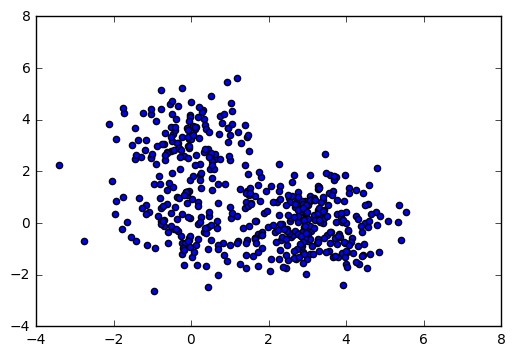

In [15]:
plt.scatter(df['x'], df['y'])

In [311]:
#INITIALIZE (change later)
k=3

In [312]:
mu_list = []
for i in range(k):
    mu_sample_x = np.random.uniform(low=min(df['x']), high=max(df['x']))
    mu_sample_y = np.random.uniform(low=min(df['y']), high=max(df['y']))
    mu_list.append([mu_sample_x, mu_sample_y])
    
mu_list = pd.DataFrame(mu_list)
mu_list.columns = ['x', 'y']

In [313]:
def k_means_class(points, centroids):
    cluster = []
    for i in range(len(points)):
        point_dist = []
        for j in range(len(centroids)):
            point_dist.append(np.linalg.norm(points.loc[i]-centroids.loc[j]))
        cluster.append(point_dist.index(min(point_dist)))
    return(cluster)

In [314]:
objective = []

for i in range(20):
    classes = np.array(k_means_class(df, mu_list))
    for j in range(len(mu_list)):
        mu_list.loc[j] = np.mean(df.loc[np.where(classes == j)])
        
    temp_objective = 0
    
    for mu in range(len(mu_list)):
        for point in df.loc[np.where(classes == mu)].index:
            temp_objective += np.linalg.norm(df.loc[point]-mu_list.loc[mu])
    
    objective.append(temp_objective)

In [318]:
objective = []

for k in [2, 3, 4, 5]:
    mu_list = []
    for i in range(k):
        mu_sample_x = np.random.uniform(low=min(df['x']), high=max(df['x']))
        mu_sample_y = np.random.uniform(low=min(df['y']), high=max(df['y']))
        mu_list.append([mu_sample_x, mu_sample_y])

    mu_list = pd.DataFrame(mu_list)
    mu_list.columns = ['x', 'y']
    
    single_objective = []

    for i in range(20):
        classes = np.array(k_means_class(df, mu_list))
        for j in range(len(mu_list)):
            mu_list.loc[j] = np.mean(df.loc[np.where(classes == j)])

        temp_objective = 0

        for mu in range(len(mu_list)):
            for point in df.loc[np.where(classes == mu)].index:
                temp_objective += np.linalg.norm(df.loc[point]-mu_list.loc[mu])

        single_objective.append(temp_objective)
        
    objective.append(single_objective)

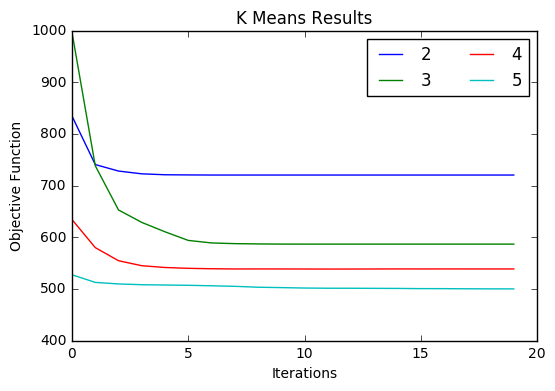

In [326]:
fig = plt.figure()
labels = [2, 3, 4, 5]

for i in range(len(objective)):
    plt.plot(range(20), objective[i])
    
plt.legend(labels, loc='upper right', ncol = 2)
plt.xlabel('Iterations')
plt.ylabel('Objective Function')
plt.title('K Means Results')

plt.show()
#ADD LABELS

# Plots

In [302]:
asdf = df[['x', 'y']]

In [303]:
asdf['class'] = classes

In [304]:
asdf

,x,y,class
0,-0.391900,0.249321,2
1,-0.819285,-0.537360,2
2,-0.034703,0.518091,2
3,-0.827024,-1.581847,2
4,-1.472835,1.509606,3
5,0.583437,-1.534114,2
6,-0.254565,-0.006091,2
7,-0.720660,0.441641,2
8,-0.993186,0.016634,2
9,0.286955,0.554856,2


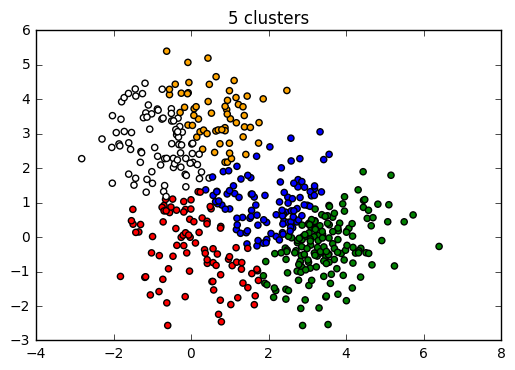

In [327]:
color_class = {0:'blue', 1:'orange', 2:'red', 3:'white', 4:'green'}

plt.title('5 clusters')

plt.scatter(asdf['x'], asdf['y'], c=asdf['class'].apply(lambda x: color_class[x]))

In [306]:
df.loc[np.where(classes == 0)].index

Int64Index([ 10,  22,  31,  44,  47,  48,  53,  55,  59,  60,
            ...
            403, 404, 405, 434, 444, 454, 460, 484, 492, 495],
           dtype='int64', length=101)

In [315]:
k3plot = df[['x', 'y']]

In [316]:
k3plot['class'] = classes

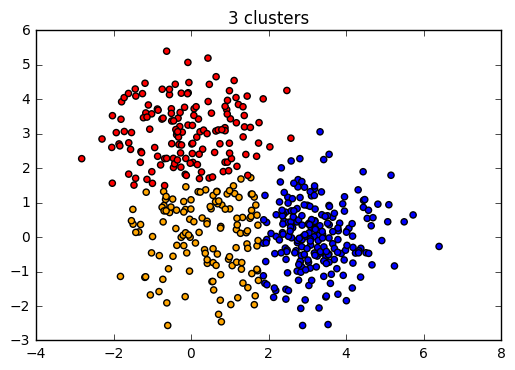

In [328]:
color_class = {0:'blue', 1:'orange', 2:'red'}

plt.title('3 clusters')

plt.scatter(k3plot['x'], k3plot['y'], c=k3plot['class'].apply(lambda x: color_class[x]))

In [26]:
!jupyter nbconvert --to script K_Means.ipynb

[NbConvertApp] Converting notebook K_Means.ipynb to script
[NbConvertApp] Writing 4078 bytes to K_Means.py
